# Import Packages

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

# Import Data

In [4]:
df = pd.read_csv('customer_churn_simple.csv')

# Data Understanding 
- Missing Values
- Data Types
- Shape

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Cust_id           10000 non-null  int64
 1   Gender            10000 non-null  int64
 2   Tenure            10000 non-null  int64
 3   NumberofProducts  10000 non-null  int64
 4   HasCreditCard     10000 non-null  int64
 5   IsActiveMember    10000 non-null  int64
 6   Churn             10000 non-null  int64
dtypes: int64(7)
memory usage: 547.0 KB


# Idendify Numerical and Categorical features

In [6]:
numerical_features = df.drop(['Cust_id', 'Churn'], axis = 1).select_dtypes(include = 'number').columns.tolist()
numerical_features

['Gender', 'Tenure', 'NumberofProducts', 'HasCreditCard', 'IsActiveMember']

# Partition into X and y

In [7]:
y = df['Churn']
X = df[numerical_features]

<AxesSubplot:>

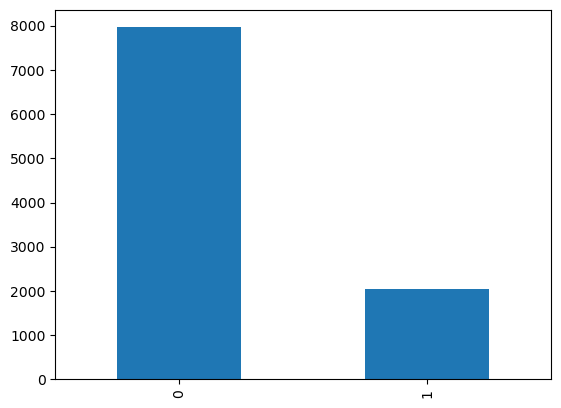

In [9]:
df['Churn'].value_counts().plot.bar()

# Split into Train Test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42, stratify = y)

# Preprocessing
- Missing Value Treatment
- Outlier Treatment
- Numerical Tranformation
- Categorical Encoding
- ** Feature Selection, Dimentionality Reduction

# Numerical Treatment

# Categorical Treatment

# Model

In [56]:
# Create Instance
dt = DecisionTreeClassifier()

In [57]:
# Fit
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
dt.get_depth()

12

# Predictions

In [59]:
y_pred_train_class = dt.predict(X_train)
y_pred_test_class = dt.predict(X_test)

In [60]:
y_pred_train_proba = dt.predict_proba(X_train)[:,0]

# Performance Metrics

In [61]:
print(classification_report(y_train, y_pred_train_class))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      6370
           1       0.81      0.16      0.27      1630

    accuracy                           0.82      8000
   macro avg       0.81      0.57      0.58      8000
weighted avg       0.82      0.82      0.77      8000



In [62]:
print(classification_report(y_test, y_pred_test_class))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1593
           1       0.80      0.15      0.26       407

    accuracy                           0.82      2000
   macro avg       0.81      0.57      0.58      2000
weighted avg       0.82      0.82      0.77      2000

